<a href="https://colab.research.google.com/github/Tahagho82/moon-classification-with-tensorflow/blob/main/Separating_colored_sphere_areas_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's start together.

In [12]:
# First import the what we want to use.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split


In [13]:
# Import data into our code

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X.shape , y.shape

((1000, 2), (1000,))

In [14]:
  # Visualizing X and y

  datas  = pd.DataFrame({'X0' : X[:,0],
                'X1' : X[:,1],
                'y'  : y})

  datas

,X0,X1,y
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0
...,...,...,...
995,0.835830,0.435532,0
996,-0.195852,0.833794,0
997,1.727608,-0.428829,1
998,-1.014486,0.135229,0


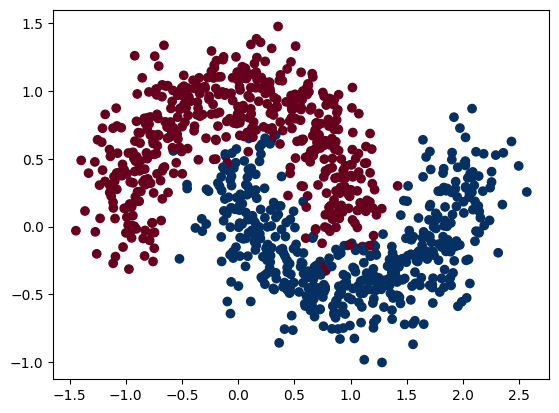

In [15]:
# Visualizing X and y

plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdBu)

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.15)

len(X_train), len(X_test) , len(y_train) , len(y_test)

(850, 150, 850, 150)

In [22]:
# Let's create our model for separating the nodes

# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model
history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6424 - loss: 0.6672 - learning_rate: 1.0000e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.6241 - learning_rate: 1.1220e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.5817 - learning_rate: 1.2589e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8204 - loss: 0.5394 - learning_rate: 1.4125e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8184 - loss: 0.4968 - learning_rate: 1.5849e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.4544 - learning_rate: 1.7783e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.4146 - learning_rate: 1.9953e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8328 - loss: 0.3794 - learning_rate: 2.2387e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.3513 - learning_

Text(0.5, 0, 'epochs')

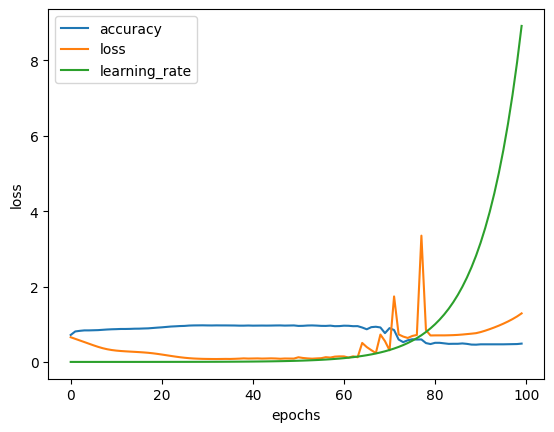

In [26]:
# Plot Loss, Accuracy, Learning rate
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0, 0.5, 'loss')

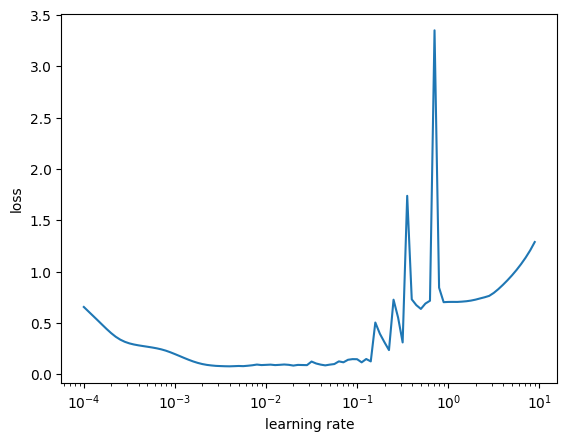

In [27]:
# Find Best learning rate
lr = 1e-4 * 10**(tf.range(100)/20)
plt.semilogx(lr, history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

**Best learning rate is between 10e-3 and 10e-2**

Lets create our model again.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Model shape
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

# Model algorithm
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6503 - loss: 0.6434
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.3933
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3155 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.2942
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8614 - loss: 0.2784
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.2635
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2475
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2287 
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.2082 
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.1877
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.1676 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [39]:
model_2.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0765  


[0.06504835933446884, 0.9733333587646484]

Text(0.5, 0, 'epochs')

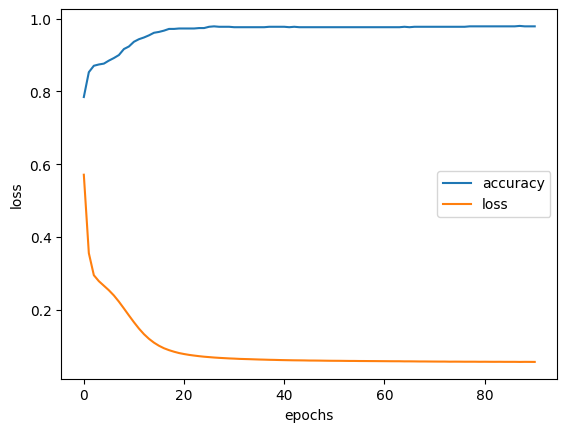

In [30]:
# Lets plot our model information per epoch
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


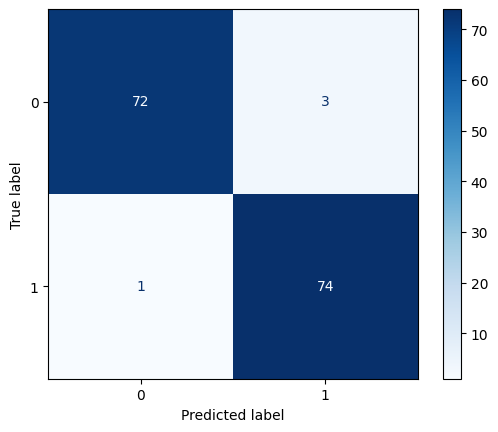

In [34]:
# How about Confusion matrix ?
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# Make predictions
y_pred = model_2.predict(X_test)

y_pred = tf.squeeze(tf.round(y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
# Code plot_decision_boundary
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
 x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
 y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  # This are just the boundaries, the lowest and the highest

  # Read about numpy meshgrids to know more

 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we are going to make predictions on these)
 x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
 y_pred = model.predict(x_in)

  # Check for multi-class
 if len(y_pred[0]) > 1:
    print("It is multiclass")
    # We will have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape) #
 else:
    print("It is binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
 plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
 plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
It is binary
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
It is binary


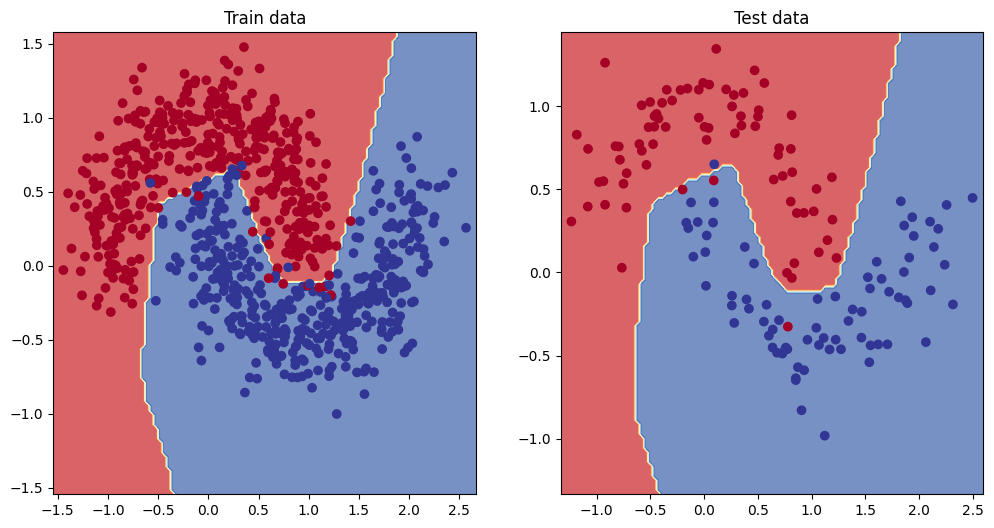

In [41]:
# Show result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train data')
plot_decision_boundary(model_2,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test data')
plot_decision_boundary(model_2,X_test,y_test)